In [1]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import os

In [2]:
# Path to your CSVs
path = "/Users/harshit/Downloads/Research-Commons-Quant/memetoken-index-RC5/dataframes/*.csv"
csv_files = glob.glob(path)

print(f"Found {len(csv_files)} CSV files.\n")

# Print filename and number of rows
for file in csv_files:
    try:
        df = pd.read_csv(file)
        token = os.path.basename(file).replace(".csv", "")
        print(f"{token}: {df.shape[0]} rows")
    except Exception as e:
        print(f"Failed to read {file}: {e}")

Found 5 CSV files.

JOE: 386 rows
KIZUNA: 395 rows
HAY: 373 rows
TITANX: 369 rows
BIGTIME: 386 rows


### Relative Price analysis

In [ ]:
# Step 1: Load CSV files
path = "/Users/harshit/Downloads/Research-Commons-Quant/memetoken-index-RC5/dataframes/*.csv"
csv_files = glob.glob(path)
print(f"Found {len(csv_files)} CSV files.\n")

relative_prices = {}

# Step 2: Loop and process each token
for file in csv_files:
    token = os.path.basename(file).replace(".csv", "")
    try:
        df = pd.read_csv(file)

        # Print column names for debugging
        print(f"{token} columns: {df.columns.tolist()}")

        # Normalize column names
        df.columns = df.columns.str.lower()

        if 'close' not in df.columns:
            print(f"⚠️ Skipping {token}: 'close' column not found.")
            continue

        df = df.sort_values(by='close').reset_index(drop=True)
        df['days_since_launch'] = df.index
        df = df[['days_since_launch', 'close']].rename(columns={'close': token})
        df = df.set_index('days_since_launch')

        relative_prices[token] = df
        print(f"✅ Loaded {token}: {df.shape[0]} rows.\n")

    except Exception as e:
        print(f"❌ Failed to process {token}: {e}\n")

# Step 3: Combine (only keeps overlapping days across all)
if relative_prices:
    aligned_relative_df = pd.concat(relative_prices.values(), axis=1, join="inner")
    print(f"\n✅ Combined DataFrame shape: {aligned_relative_df.shape}")
    display(aligned_relative_df.head())
else:
    print("\n❌ No valid data found in any token.")


Found 5 CSV files.

JOE columns: ['timestamp', 'open', 'high', 'low', 'close', 'volume', 'trades', 'return', 'log_return', 'cumulative_return', 'sharpe_ratio', 'cum_max', 'drawdown', 'turnover']
✅ Loaded JOE: 386 rows.

KIZUNA columns: ['timestamp', 'open', 'high', 'low', 'close', 'volume', 'trades', 'return', 'log_return', 'cumulative_return', 'sharpe_ratio', 'cum_max', 'drawdown', 'turnover']
✅ Loaded KIZUNA: 395 rows.

HAY columns: ['timestamp', 'open', 'high', 'low', 'close', 'volume', 'trades', 'return', 'log_return', 'cumulative_return', 'sharpe_ratio', 'cum_max', 'drawdown', 'turnover']
✅ Loaded HAY: 373 rows.

TITANX columns: ['timestamp', 'open', 'high', 'low', 'close', 'volume', 'trades', 'return', 'log_return', 'cumulative_return', 'sharpe_ratio', 'cum_max', 'drawdown', 'turnover']
✅ Loaded TITANX: 369 rows.

BIGTIME columns: ['timestamp', 'open', 'high', 'low', 'close', 'volume', 'trades', 'return', 'log_return', 'cumulative_return', 'sharpe_ratio', 'cum_max', 'drawdown', '

,JOE,KIZUNA,HAY,TITANX,BIGTIME
days_since_launch,,,,,
0,0.000069,4.306128e-10,89931.955805,1.562215e-07,0.062959
1,0.000122,4.320805e-10,90167.074290,1.576178e-07,0.065159
2,0.000297,4.802610e-10,94653.731266,1.596263e-07,0.066339
3,0.000402,4.952911e-10,96472.647579,1.619952e-07,0.066884
4,0.000722,6.253470e-10,97382.301611,1.624204e-07,0.067709


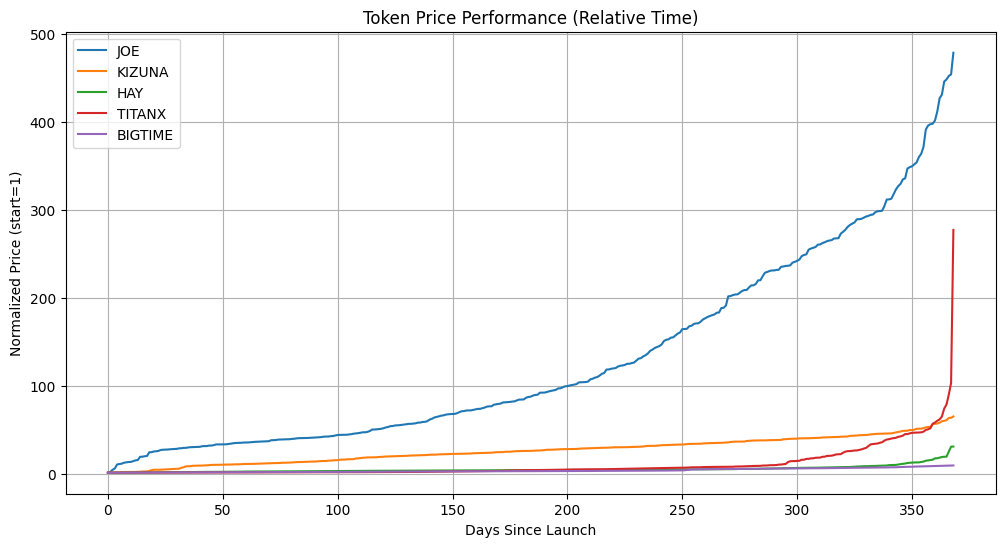

In [11]:
import matplotlib.pyplot as plt

aligned_relative_df_normalized = aligned_relative_df / aligned_relative_df.iloc[0]  # rebased to 1
aligned_relative_df_normalized.plot(figsize=(12, 6), title="Token Price Performance (Relative Time)")
plt.xlabel("Days Since Launch")
plt.ylabel("Normalized Price (start=1)")
plt.grid(True)
plt.show()

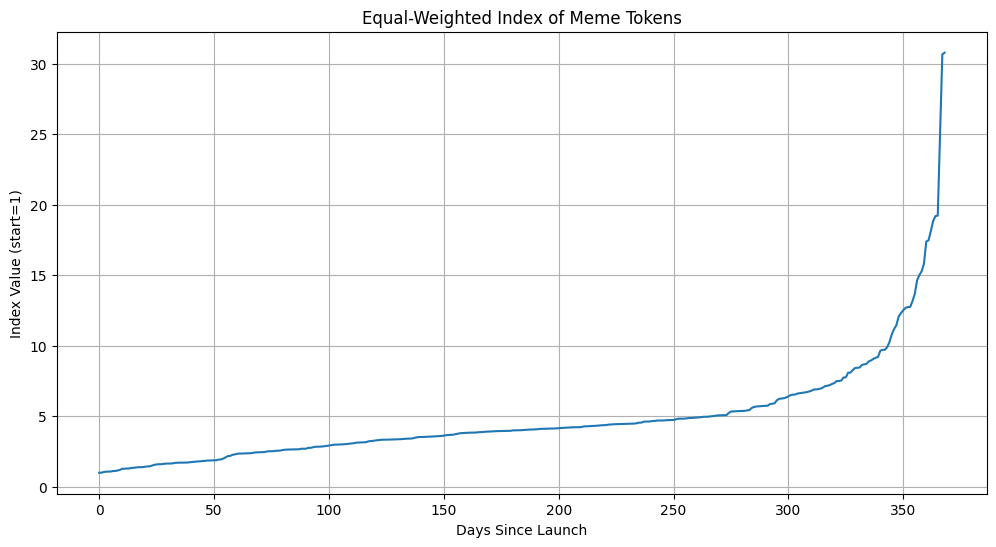

In [12]:
index_series = aligned_relative_df.mean(axis=1)  # equal weights
index_series_normalized = index_series / index_series.iloc[0]  # rebased to 1

index_series_normalized.plot(figsize=(12, 6), title="Equal-Weighted Index of Meme Tokens")
plt.xlabel("Days Since Launch")
plt.ylabel("Index Value (start=1)")
plt.grid(True)
plt.show()


### Portfolio Performance

In [19]:
# === Load volume data ===
volume_df = {}

for file in csv_files:
    token = os.path.basename(file).replace(".csv", "")
    try:
        df = pd.read_csv(file)
        df.columns = df.columns.str.lower()

        if 'volume' not in df.columns:
            print(f"⚠️ Skipping {token}: 'volume' column not found.")
            continue

        df = df.sort_values(by='close').reset_index(drop=True)
        df['days_since_launch'] = df.index
        df = df[['days_since_launch', 'volume']].rename(columns={'volume': token})
        df = df.set_index('days_since_launch')

        volume_df[token] = df
        print(f"✅ Volume loaded for {token}: {df.shape[0]} rows.")

    except Exception as e:
        print(f"❌ Failed to process volume for {token}: {e}")

# === Align volume DataFrame (inner join) ===
if volume_df:
    aligned_volume_df = pd.concat(volume_df.values(), axis=1, join="inner")
    aligned_volume_df.columns = list(volume_df.keys())
    print(f"\n✅ Combined Volume DataFrame shape: {aligned_volume_df.shape}")
    display(aligned_volume_df.head())
else:
    print("\n❌ No valid volume data found.")


✅ Volume loaded for JOE: 386 rows.
✅ Volume loaded for KIZUNA: 395 rows.
✅ Volume loaded for HAY: 373 rows.
✅ Volume loaded for TITANX: 369 rows.
✅ Volume loaded for BIGTIME: 386 rows.

✅ Combined Volume DataFrame shape: (369, 5)


,JOE,KIZUNA,HAY,TITANX,BIGTIME
days_since_launch,,,,,
0,4.794330e+05,11577.100991,1135.276183,201124.197659,98650.150059
1,2.975939e+05,22220.886103,585.542486,469790.791805,6134.721726
2,1.284353e+06,39113.771405,42.896406,165339.143671,5152.629803
3,6.583806e+05,40292.303853,710.523574,214973.277793,4305.971075
4,4.107778e+04,182765.615638,2580.716182,340735.776965,2360.179212


In [ ]:
def compute_portfolio_metrics(prices, volumes, start_day, end_day, initial_capital=1000): ## we kept initial capital as 1000-USD
    prices = prices.iloc[start_day:end_day+1]
    volumes = volumes.iloc[start_day]

    daily_returns = prices.pct_change().dropna()
    vol_weights = volumes / volumes.sum()
    eq_weights = np.repeat(1 / daily_returns.shape[1], daily_returns.shape[1])

    # Equal-Weighted Portfolio
    eq_port_ret = daily_returns.dot(eq_weights)
    eq_cum = (1 + eq_port_ret).cumprod() * initial_capital

    # Volume-Weighted Portfolio
    vol_port_ret = daily_returns.dot(vol_weights)
    vol_cum = (1 + vol_port_ret).cumprod() * initial_capital

    return {
        "equal": (eq_port_ret, eq_cum),
        "volume": (vol_port_ret, vol_cum)
    }

def performance_metrics(port_returns, cum_returns_usd):
    final_value = cum_returns_usd.iloc[-1]
    sharpe = port_returns.mean() / port_returns.std() * np.sqrt(252) if port_returns.std() > 0 else np.nan
    drawdown = (1 - (1 + port_returns).cumprod() / (1 + port_returns).cumprod().cummax()).max()
    win_rate = (port_returns > 0).mean()
    expectancy = port_returns.mean() / -port_returns[port_returns < 0].mean() if (port_returns < 0).any() else np.nan
    return {
        "Final Value (USD)": final_value,
        "Total Return (%)": (final_value / 1000 - 1) * 100,
        "Sharpe Ratio": sharpe,
        "Max Drawdown": drawdown,
        "Win Rate": win_rate,
        "Expectancy": expectancy
    }


In [22]:
print("Sample of aligned_relative_df (prices):")
print(aligned_relative_df.head())

print("\nFirst row of prices (day 0):")
print(aligned_relative_df.iloc[0])

Sample of aligned_relative_df (prices):
                        JOE        KIZUNA           HAY        TITANX  \
days_since_launch                                                       
0                  0.000069  4.306128e-10  89931.955805  1.562215e-07   
1                  0.000122  4.320805e-10  90167.074290  1.576178e-07   
2                  0.000297  4.802610e-10  94653.731266  1.596263e-07   
3                  0.000402  4.952911e-10  96472.647579  1.619952e-07   
4                  0.000722  6.253470e-10  97382.301611  1.624204e-07   

                    BIGTIME  
days_since_launch            
0                  0.062959  
1                  0.065159  
2                  0.066339  
3                  0.066884  
4                  0.067709  

First row of prices (day 0):
JOE        6.905449e-05
KIZUNA     4.306128e-10
HAY        8.993196e+04
TITANX     1.562215e-07
BIGTIME    6.295870e-02
Name: 0, dtype: float64


In [23]:
aligned_relative_df_normalized = aligned_relative_df / aligned_relative_df.iloc[0]


### Analysis from Day-0 to Day-365

In [24]:
# === Compute Portfolio Performance ===
start_day = 0
end_day = min(aligned_relative_df.shape[0], aligned_volume_df.shape[0]) - 1

results = compute_portfolio_metrics(
    prices=aligned_relative_df_normalized,
    volumes=aligned_volume_df,
    start_day=start_day,
    end_day=end_day
)

# === Equal-Weighted ===
eq_ret, eq_cum = results["equal"]
eq_metrics = performance_metrics(eq_ret, eq_cum)

# === Volume-Weighted ===
vol_ret, vol_cum = results["volume"]
vol_metrics = performance_metrics(vol_ret, vol_cum)

# === Display Metrics ===
import pprint
print("\n📊 Equal-Weighted Portfolio Performance:")
pprint.pprint(eq_metrics)

print("\n📊 Volume-Weighted Portfolio Performance:")
pprint.pprint(vol_metrics)



📊 Equal-Weighted Portfolio Performance:
{'Expectancy': nan,
 'Final Value (USD)': 98618.90648710867,
 'Max Drawdown': 0.0,
 'Sharpe Ratio': 6.835355685229836,
 'Total Return (%)': 9761.890648710867,
 'Win Rate': 1.0}

📊 Volume-Weighted Portfolio Performance:
{'Expectancy': nan,
 'Final Value (USD)': 330068.958816924,
 'Max Drawdown': 0.0,
 'Sharpe Ratio': 4.335150909823002,
 'Total Return (%)': 32906.8958816924,
 'Win Rate': 1.0}


Final cumulative values per token:
JOE        478613.866162
KIZUNA      64941.426425
HAY         30765.828925
TITANX     277075.859332
BIGTIME      9236.980091
Name: 368, dtype: float64


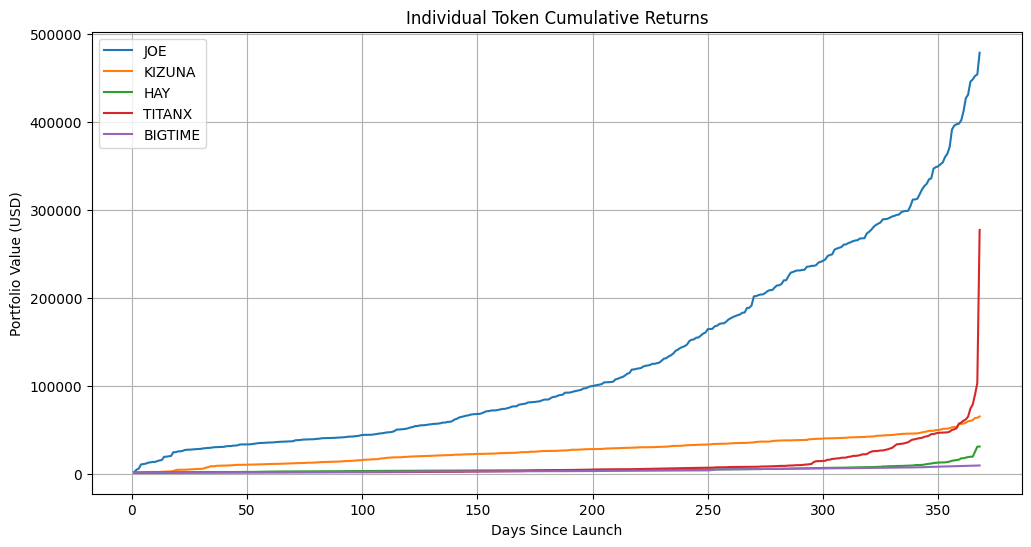

In [27]:
# Calculate daily returns per token
daily_returns_tokens = aligned_relative_df.pct_change().dropna()

# Calculate cumulative returns per token, starting from initial capital (e.g., 1000 USD)
initial_capital = 1000
cum_returns_tokens = (1 + daily_returns_tokens).cumprod() * initial_capital

# Display the last few rows to see final values per token
print("Final cumulative values per token:")
print(cum_returns_tokens.iloc[-1])

# Optionally plot cumulative returns for each token
import matplotlib.pyplot as plt
cum_returns_tokens.plot(figsize=(12, 6), title="Individual Token Cumulative Returns")
plt.xlabel("Days Since Launch")
plt.ylabel("Portfolio Value (USD)")
plt.grid(True)
plt.show()


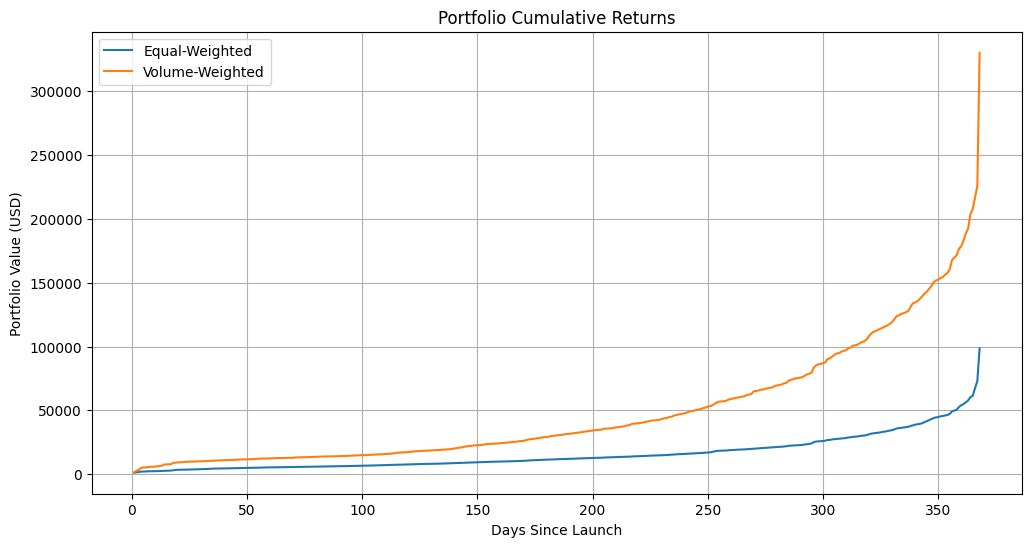

In [25]:
plt.figure(figsize=(12,6))
plt.plot(eq_cum, label='Equal-Weighted')
plt.plot(vol_cum, label='Volume-Weighted')
plt.title('Portfolio Cumulative Returns')
plt.xlabel('Days Since Launch')
plt.ylabel('Portfolio Value (USD)')
plt.legend()
plt.grid(True)
plt.show()


### Analysis from Day-0 to Day-30

In [28]:
# === Compute Portfolio Performance ===
start_day = 0
end_day = 31

results = compute_portfolio_metrics(
    prices=aligned_relative_df_normalized,
    volumes=aligned_volume_df,
    start_day=start_day,
    end_day=end_day
)

# === Equal-Weighted ===
eq_ret, eq_cum = results["equal"]
eq_metrics = performance_metrics(eq_ret, eq_cum)

# === Volume-Weighted ===
vol_ret, vol_cum = results["volume"]
vol_metrics = performance_metrics(vol_ret, vol_cum)

# === Display Metrics ===
import pprint
print("\n📊 Equal-Weighted Portfolio Performance:")
pprint.pprint(eq_metrics)

print("\n📊 Volume-Weighted Portfolio Performance:")
pprint.pprint(vol_metrics)



📊 Equal-Weighted Portfolio Performance:
{'Expectancy': nan,
 'Final Value (USD)': 3903.064964499271,
 'Max Drawdown': 0.0,
 'Sharpe Ratio': 10.685585317353663,
 'Total Return (%)': 290.30649644992707,
 'Win Rate': 1.0}

📊 Volume-Weighted Portfolio Performance:
{'Expectancy': nan,
 'Final Value (USD)': 10215.856482401952,
 'Max Drawdown': 0.0,
 'Sharpe Ratio': 7.557634014127028,
 'Total Return (%)': 921.5856482401952,
 'Win Rate': 1.0}


### Analysis from Day-30 to Day-60

In [31]:
# === Compute Portfolio Performance ===
start_day = 30
end_day = 61

results = compute_portfolio_metrics(
    prices=aligned_relative_df_normalized,
    volumes=aligned_volume_df,
    start_day=start_day,
    end_day=end_day
)

# === Equal-Weighted ===
eq_ret, eq_cum = results["equal"]
eq_metrics = performance_metrics(eq_ret, eq_cum)

# === Volume-Weighted ===
vol_ret, vol_cum = results["volume"]
vol_metrics = performance_metrics(vol_ret, vol_cum)

# === Display Metrics ===
import pprint
print("\n📊 Equal-Weighted Portfolio Performance:")
pprint.pprint(eq_metrics)

print("\n📊 Volume-Weighted Portfolio Performance:")
pprint.pprint(vol_metrics)



📊 Equal-Weighted Portfolio Performance:
{'Expectancy': nan,
 'Final Value (USD)': 1395.23173392669,
 'Max Drawdown': 0.0,
 'Sharpe Ratio': 18.741833051106756,
 'Total Return (%)': 39.523173392668994,
 'Win Rate': 1.0}

📊 Volume-Weighted Portfolio Performance:
{'Expectancy': nan,
 'Final Value (USD)': 1289.5925591698722,
 'Max Drawdown': 0.0,
 'Sharpe Ratio': 18.517896408190744,
 'Total Return (%)': 28.959255916987225,
 'Win Rate': 1.0}
